In [1]:
print('f')

f


In [17]:
import keras
import tensorflow as tf
import sys
sys.path.append("/kaggle/input/libraray-v6")
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

In [18]:
if torch.cuda. is_available():
    device = torch.device('cuda')
    print("cuda를사용")
else:
    device = torch.device('cpu')
    print("cpu를사용")

cuda를사용


In [20]:
import os
import cv2
# 데이터 디렉토리 경로
base_directory = './pj'
# 사용할 카테고리 폴더 이름
category_name = 'battery'  # 예시: 'battery', 'biological', 'cardboard', ...
# 카테고리 폴더 경로
category_directory = os.path.join(base_directory, category_name)
# 카테고리 폴더 내 첫 번째 이미지 파일 경로
file_list = os.listdir(category_directory)
image_path = os.path.join(category_directory, file_list[0])
# 이미지 읽기 (OpenCV 사용)
recycle = cv2.imread(image_path)

In [21]:
import cv2
import os

# 데이터 디렉토리 경로
base_directory = './pj'
# 사용할 카테고리 폴더 이름
category_name = 'battery'  # 예시: 'battery', 'biological', 'cardboard', ...
# 카테고리 폴더 경로
category_directory = os.path.join(base_directory, category_name)
# 카테고리 폴더 내 첫 번째 이미지 파일 경로
file_list = os.listdir(category_directory)
image_path = os.path.join(category_directory, file_list[0])

# 이미지 읽기 (OpenCV 사용)
recycle = cv2.imread(image_path)

# 이미지 출력
cv2.imshow('Recycle Image', recycle)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [22]:
# 이미지 크기 조정 (예: 800x600)
resized_image = cv2.resize(recycle, (800, 600))

# 조정된 이미지 출력
cv2.imshow('Resized Image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [23]:
# 그레이스케일 변환
gray_image = cv2.cvtColor(recycle, cv2.COLOR_BGR2GRAY)

# 그레이스케일 이미지 출력
cv2.imshow('Gray Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [24]:
# 처리된 이미지 저장 (예: 그레이스케일 이미지 저장)
output_path = os.path.join(category_directory, 'gray_image.jpg')
cv2.imwrite(output_path, gray_image)
print(f"이미지가 저장되었습니다: {output_path}")


이미지가 저장되었습니다: ./pj\battery\gray_image.jpg


In [25]:
import cv2
import os
import numpy as np

# 데이터 디렉토리 경로
base_directory = './pj'
# 사용할 카테고리 폴더 이름
category_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
# 일관된 정사각형 크기 설정 (534x534)
target_size = (534, 534)

for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    file_list = os.listdir(category_directory)
    
    for file_name in file_list:
        image_path = os.path.join(category_directory, file_name)
        # 이미지 읽기 (OpenCV 사용)
        image = cv2.imread(image_path)
        
        # 그레이스케일 변환
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # 현재 이미지 크기
        h, w = gray_image.shape
        
        # 정사각형 패딩 계산
        if h > w:
            diff = h - w
            pad_left = diff // 2
            pad_right = diff - pad_left
            pad_top, pad_bottom = 0, 0
        else:
            diff = w - h
            pad_top = diff // 2
            pad_bottom = diff - pad_top
            pad_left, pad_right = 0, 0
        
        # 패딩 추가
        padded_image = cv2.copyMakeBorder(
            gray_image,
            pad_top, pad_bottom,
            pad_left, pad_right,
            cv2.BORDER_CONSTANT,
            value=[0, 0, 0]
        )
        
        # 패딩 후 리사이즈
        resized_image = cv2.resize(padded_image, target_size)
        
        # 처리된 이미지 저장
        output_path = os.path.join(category_directory, f'gray_resized_{file_name}')
        cv2.imwrite(output_path, resized_image)
        print(f"처리된 이미지가 저장되었습니다: {output_path}")


처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_1.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_10.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_100.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_101.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_102.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_103.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_104.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_105.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_106.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_107.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_108.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_109.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_11.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_110.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_111.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_battery_112.jpg
처리된 이미지가 저장되었습니다: ./pj\battery\gray_resized_

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [27]:
import cv2
import os

# 데이터 디렉토리 경로
base_directory = './pj'
# 사용할 카테고리 폴더 이름
category_names = ['shoes', 'trash']
# 일관된 정사각형 크기 설정 (534x534)
target_size = (534, 534)
# 처리된 이미지를 저장할 폴더 경로
output_base_directory = './pj_gray'

# 처리된 이미지를 저장할 폴더가 존재하지 않으면 생성
if not os.path.exists(output_base_directory):
    os.makedirs(output_base_directory)

for category_name in category_names:
    category_directory = os.path.join(base_directory, category_name)
    output_category_directory = os.path.join(output_base_directory, category_name)
    
    # 카테고리 폴더가 존재하지 않으면 생성
    if not os.path.exists(output_category_directory):
        os.makedirs(output_category_directory)
    
    file_list = os.listdir(category_directory)
    
    for file_name in file_list:
        image_path = os.path.join(category_directory, file_name)
        # 이미지 읽기 (OpenCV 사용)
        image = cv2.imread(image_path)
        
        # 그레이스케일 변환
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # 현재 이미지 크기
        h, w = gray_image.shape
        
        # 정사각형 패딩 계산
        if h > w:
            diff = h - w
            pad_left = diff // 2
            pad_right = diff - pad_left
            pad_top, pad_bottom = 0, 0
        else:
            diff = w - h
            pad_top = diff // 2
            pad_bottom = diff - pad_top
            pad_left, pad_right = 0, 0
        
        # BORDER_REPLICATE를 사용하여 패딩 추가
        padded_image = cv2.copyMakeBorder(
            gray_image,
            pad_top, pad_bottom,
            pad_left, pad_right,
            cv2.BORDER_REPLICATE
        )
        
        # 패딩 후 리사이즈
        resized_image = cv2.resize(padded_image, target_size)
        
        # 처리된 이미지 저장
        output_path = os.path.join(output_category_directory, f'gray_resized_{file_name}')
        cv2.imwrite(output_path, resized_image)
        print(f"처리된 이미지가 저장되었습니다: {output_path}")


처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_10.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_100.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1000.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1001.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1002.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1003.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1004.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1005.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1006.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1007.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1008.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1009.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_101.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1010.jpg
처리된 이미지가 저장되었습니다: ./pj_gray\shoes\gray_resized_shoes_1011.jpg
처리된 이미지가 저장되었습니

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 디렉토리 경로
train_dir = './pj_gray'

# 이미지 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 데이터의 20%를 검증 데이터로 사용
)

# 훈련 데이터 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(534, 534),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # 훈련 데이터로 사용
)

# 검증 데이터 제너레이터
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(534, 534),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 검증 데이터로 사용
)


Found 17194 images belonging to 10 classes.
Found 4294 images belonging to 10 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(534, 534, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\ProgramData\anaconda3\envs\ma\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
import numpy as np
if torch.cuda. is_available():
    device = torch.device('cuda')
    print("cuda를사용")
else:
    device = torch.device('cpu')
    print("cpu를사용")

cuda를사용


In [42]:
import os
import shutil
from sklearn.model_selection import train_test_split

data_dir = './pj_gray'
output_dir = './pj_gray_split'
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Train, val 폴더 생성
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    
    class_dir = os.path.join(data_dir, cls)
    images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
        
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))

print("Data splitting completed.")

Data splitting completed.


In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# 데이터 전처리 및 로드
data_transforms = {
    'train': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # 그레이스케일로 변환
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])  # 그레이스케일 이미지는 평균과 표준편차를 [0.5]로 설정
    ]),
    'val': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
}

data_dir = './pj_gray_split'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))  # Adaptive Average Pooling
        self.fc1 = nn.Linear(128, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

num_classes = len(class_names)
model = SimpleCNN(num_classes).to(device)


In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
        
        print()

    return model

model = train_model(model, criterion, optimizer, num_epochs=10)


Epoch 0/9
----------
train Loss: 1.8492 Acc: 0.3541
val Loss: 1.7493 Acc: 0.4085

Epoch 1/9
----------
train Loss: 1.7006 Acc: 0.4169
val Loss: 1.6114 Acc: 0.4527

Epoch 2/9
----------
train Loss: 1.5866 Acc: 0.4603
val Loss: 1.4831 Acc: 0.4941

Epoch 3/9
----------
train Loss: 1.4725 Acc: 0.5019
val Loss: 1.3750 Acc: 0.5308

Epoch 4/9
----------
train Loss: 1.3774 Acc: 0.5372
val Loss: 1.2650 Acc: 0.5822

Epoch 5/9
----------
train Loss: 1.3020 Acc: 0.5648
val Loss: 1.2261 Acc: 0.5759

Epoch 6/9
----------
train Loss: 1.2344 Acc: 0.5835
val Loss: 1.1221 Acc: 0.6278

Epoch 7/9
----------
train Loss: 1.1588 Acc: 0.6090
val Loss: 1.1054 Acc: 0.6273

Epoch 8/9
----------
train Loss: 1.1161 Acc: 0.6238
val Loss: 1.0477 Acc: 0.6545

Epoch 9/9
----------
train Loss: 1.0715 Acc: 0.6386
val Loss: 0.9931 Acc: 0.6775



In [6]:
#10~19번 돌리기
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
        
        print()

    return model

model = train_model(model, criterion, optimizer, num_epochs=10)


Epoch 0/9
----------
train Loss: 1.0319 Acc: 0.6576
val Loss: 0.9668 Acc: 0.6752

Epoch 1/9
----------
train Loss: 0.9994 Acc: 0.6666
val Loss: 1.0010 Acc: 0.6687

Epoch 2/9
----------
train Loss: 0.9748 Acc: 0.6792
val Loss: 0.9218 Acc: 0.6996

Epoch 3/9
----------
train Loss: 0.9372 Acc: 0.6877
val Loss: 0.9438 Acc: 0.6833

Epoch 4/9
----------
train Loss: 0.9063 Acc: 0.7012
val Loss: 0.8396 Acc: 0.7243

Epoch 5/9
----------
train Loss: 0.8753 Acc: 0.7087
val Loss: 0.8546 Acc: 0.7296

Epoch 6/9
----------
train Loss: 0.8521 Acc: 0.7198
val Loss: 0.9149 Acc: 0.6961

Epoch 7/9
----------
train Loss: 0.8263 Acc: 0.7253
val Loss: 0.7841 Acc: 0.7519

Epoch 8/9
----------
train Loss: 0.8093 Acc: 0.7322
val Loss: 0.8164 Acc: 0.7396

Epoch 9/9
----------
train Loss: 0.7787 Acc: 0.7432
val Loss: 0.7783 Acc: 0.7577



In [16]:
#10~19번 돌리기
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
        
        print()

    return model

model = train_model(model, criterion, optimizer, num_epochs=10)


Epoch 0/9
----------
train Loss: 0.7642 Acc: 0.7494
val Loss: 0.7915 Acc: 0.7510

Epoch 1/9
----------
train Loss: 0.7418 Acc: 0.7585
val Loss: 0.7196 Acc: 0.7714

Epoch 2/9
----------
train Loss: 0.7205 Acc: 0.7638
val Loss: 0.7466 Acc: 0.7656

Epoch 3/9
----------
train Loss: 0.6956 Acc: 0.7706
val Loss: 0.7049 Acc: 0.7805

Epoch 4/9
----------
train Loss: 0.6939 Acc: 0.7769
val Loss: 0.7119 Acc: 0.7807

Epoch 5/9
----------
train Loss: 0.6605 Acc: 0.7811
val Loss: 0.7460 Acc: 0.7687

Epoch 6/9
----------
train Loss: 0.6494 Acc: 0.7848
val Loss: 0.6628 Acc: 0.7961

Epoch 7/9
----------
train Loss: 0.6318 Acc: 0.7926
val Loss: 0.7118 Acc: 0.7805

Epoch 8/9
----------
train Loss: 0.6067 Acc: 0.8000
val Loss: 0.6775 Acc: 0.7882

Epoch 9/9
----------
train Loss: 0.6060 Acc: 0.8035
val Loss: 0.6465 Acc: 0.8049



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
        
        print()

    return model

model = train_model(model, criterion, optimizer, num_epochs=10)

In [17]:
def evaluate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
        
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    total_loss = running_loss / len(dataloader.dataset)
    total_acc = running_corrects.double() / len(dataloader.dataset)
    
    return total_loss, total_acc

# 최종 검증 성능
final_loss, final_acc = evaluate_model(model, dataloaders['val'], criterion)
print(f'Final Validation Loss: {final_loss:.4f}')
print(f'Final Validation Accuracy: {final_acc:.4f}')


Final Validation Loss: 0.6465
Final Validation Accuracy: 0.8049


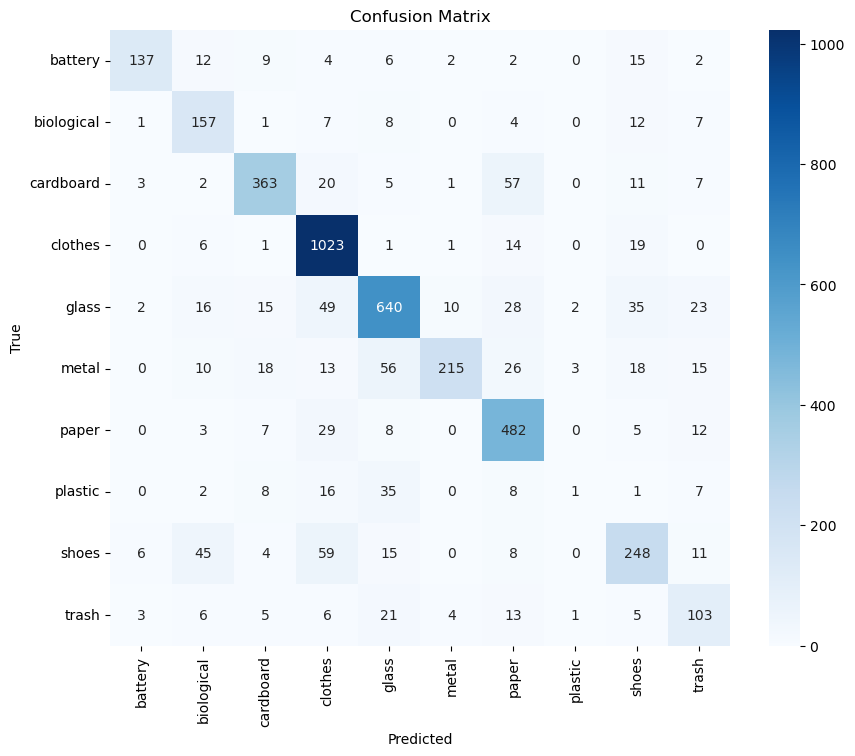

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, dataloader, classes):
    model.eval()
    all_preds = []
    all_labels = []
    
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
    
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# 혼동 행렬 시각화
plot_confusion_matrix(model, dataloaders['val'], class_names)


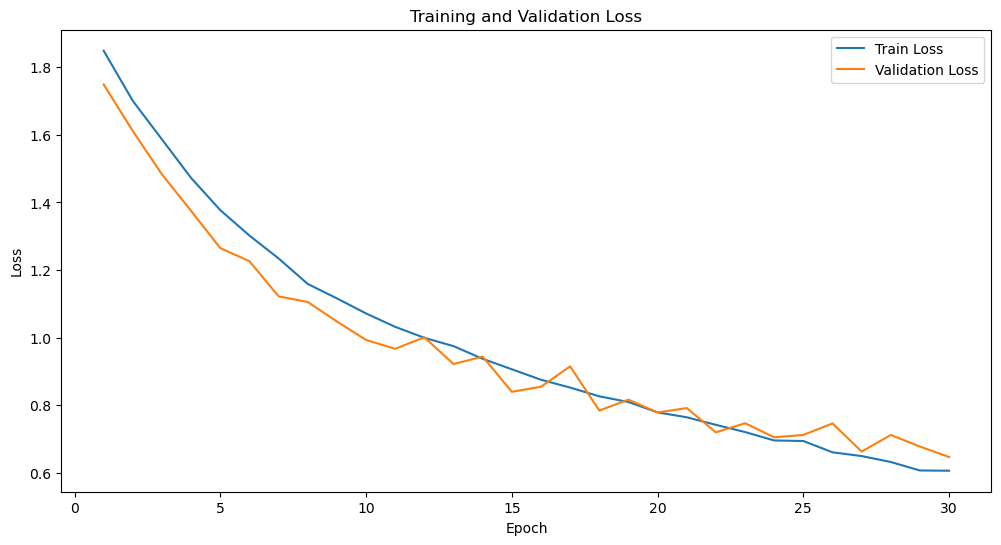

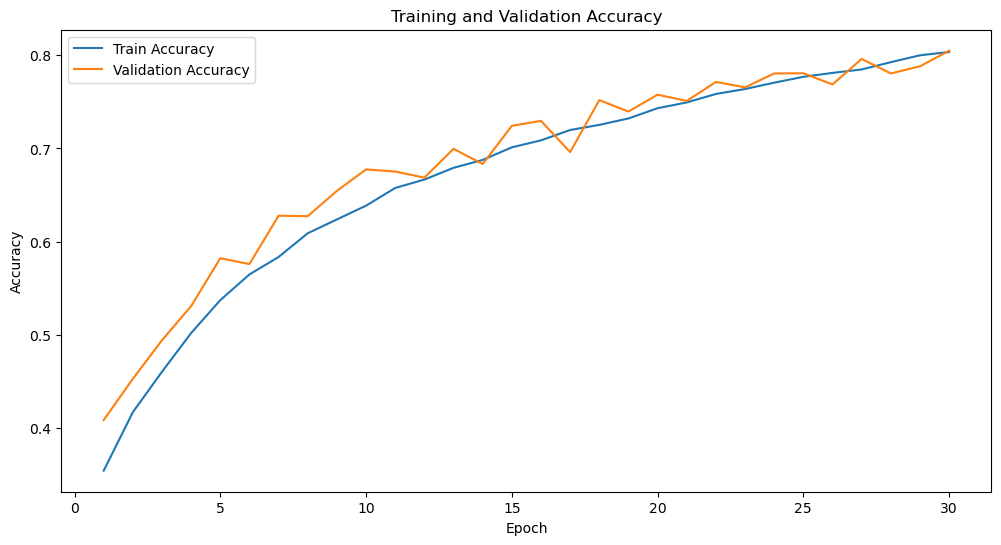

In [23]:
import re
import matplotlib.pyplot as plt

log_text = """
Epoch 0/9
----------
train Loss: 1.8492 Acc: 0.3541
val Loss: 1.7493 Acc: 0.4085

Epoch 1/9
----------
train Loss: 1.7006 Acc: 0.4169
val Loss: 1.6114 Acc: 0.4527

Epoch 2/9
----------
train Loss: 1.5866 Acc: 0.4603
val Loss: 1.4831 Acc: 0.4941

Epoch 3/9
----------
train Loss: 1.4725 Acc: 0.5019
val Loss: 1.3750 Acc: 0.5308

Epoch 4/9
----------
train Loss: 1.3774 Acc: 0.5372
val Loss: 1.2650 Acc: 0.5822

Epoch 5/9
----------
train Loss: 1.3020 Acc: 0.5648
val Loss: 1.2261 Acc: 0.5759

Epoch 6/9
----------
train Loss: 1.2344 Acc: 0.5835
val Loss: 1.1221 Acc: 0.6278

Epoch 7/9
----------
train Loss: 1.1588 Acc: 0.6090
val Loss: 1.1054 Acc: 0.6273

Epoch 8/9
----------
train Loss: 1.1161 Acc: 0.6238
val Loss: 1.0477 Acc: 0.6545

Epoch 9/9
----------
train Loss: 1.0715 Acc: 0.6386
val Loss: 0.9931 Acc: 0.6775


Epoch 0/9
----------
train Loss: 1.0319 Acc: 0.6576
val Loss: 0.9668 Acc: 0.6752

Epoch 1/9
----------
train Loss: 0.9994 Acc: 0.6666
val Loss: 1.0010 Acc: 0.6687

Epoch 2/9
----------
train Loss: 0.9748 Acc: 0.6792
val Loss: 0.9218 Acc: 0.6996

Epoch 3/9
----------
train Loss: 0.9372 Acc: 0.6877
val Loss: 0.9438 Acc: 0.6833

Epoch 4/9
----------
train Loss: 0.9063 Acc: 0.7012
val Loss: 0.8396 Acc: 0.7243

Epoch 5/9
----------
train Loss: 0.8753 Acc: 0.7087
val Loss: 0.8546 Acc: 0.7296

Epoch 6/9
----------
train Loss: 0.8521 Acc: 0.7198
val Loss: 0.9149 Acc: 0.6961

Epoch 7/9
----------
train Loss: 0.8263 Acc: 0.7253
val Loss: 0.7841 Acc: 0.7519

Epoch 8/9
----------
train Loss: 0.8093 Acc: 0.7322
val Loss: 0.8164 Acc: 0.7396

Epoch 9/9
----------
train Loss: 0.7787 Acc: 0.7432
val Loss: 0.7783 Acc: 0.7577

Epoch 0/9
----------
train Loss: 0.7642 Acc: 0.7494
val Loss: 0.7915 Acc: 0.7510

Epoch 1/9
----------
train Loss: 0.7418 Acc: 0.7585
val Loss: 0.7196 Acc: 0.7714

Epoch 2/9
----------
train Loss: 0.7205 Acc: 0.7638
val Loss: 0.7466 Acc: 0.7656

Epoch 3/9
----------
train Loss: 0.6956 Acc: 0.7706
val Loss: 0.7049 Acc: 0.7805

Epoch 4/9
----------
train Loss: 0.6939 Acc: 0.7769
val Loss: 0.7119 Acc: 0.7807

Epoch 5/9
----------
train Loss: 0.6605 Acc: 0.7811
val Loss: 0.7460 Acc: 0.7687

Epoch 6/9
----------
train Loss: 0.6494 Acc: 0.7848
val Loss: 0.6628 Acc: 0.7961

Epoch 7/9
----------
train Loss: 0.6318 Acc: 0.7926
val Loss: 0.7118 Acc: 0.7805

Epoch 8/9
----------
train Loss: 0.6067 Acc: 0.8000
val Loss: 0.6775 Acc: 0.7882

Epoch 9/9
----------
train Loss: 0.6060 Acc: 0.8035
val Loss: 0.6465 Acc: 0.8049

"""

def extract_values_from_log(log_text):
    train_loss = []
    val_loss = []
    train_acc = []
    val_acc = []
    
    train_loss_matches = re.findall(r'train Loss: ([\d.]+) Acc: ([\d.]+)', log_text)
    val_loss_matches = re.findall(r'val Loss: ([\d.]+) Acc: ([\d.]+)', log_text)
    
    for match in train_loss_matches:
        train_loss.append(float(match[0]))
        train_acc.append(float(match[1]))
    
    for match in val_loss_matches:
        val_loss.append(float(match[0]))
        val_acc.append(float(match[1]))
    
    return train_loss, val_loss, train_acc, val_acc

# 로그에서 값 추출
train_loss_history, val_loss_history, train_acc_history, val_acc_history = extract_values_from_log(log_text)

# 시각화
epochs = list(range(1, len(train_loss_history) + 1))

# 학습 및 검증 손실 시각화
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 학습 및 검증 정확도 시각화
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc_history, label='Train Accuracy')
plt.plot(epochs, val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
